In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
Auto = pd.read_csv('/content/drive/MyDrive/MLDL/Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [13]:
Auto = Auto.dropna(axis=0)

In [14]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
q = Auto.select_dtypes(include=['number']).columns
q

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year',
       'origin'],
      dtype='object')

In [6]:
print(Auto.select_dtypes(exclude=['number']).columns)

Index(['horsepower', 'name'], dtype='object')


- quantitative : mpg, cylinders, displacement, weight, acceleration,year, origin
- qualitative : horsepower, name

In [7]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
A = Auto.describe()
A.loc['range'] = Auto.describe().loc['max']-Auto.describe().loc['min']
A.loc['range']

mpg               37.6
cylinders          5.0
displacement     387.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
Name: range, dtype: float64

In [9]:
print(A.loc['mean'])

mpg               23.515869
cylinders          5.458438
displacement     193.532746
weight          2970.261965
acceleration      15.555668
year              75.994962
origin             1.574307
Name: mean, dtype: float64


In [10]:
print(A.loc['std'])

mpg               7.825804
cylinders         1.701577
displacement    104.379583
weight          847.904119
acceleration      2.749995
year              3.690005
origin            0.802549
Name: std, dtype: float64


In [11]:
A_drop = Auto.drop(Auto.index[10:85])
A_drop.index[7:]

Int64Index([  7,   8,   9,  85,  86,  87,  88,  89,  90,  91,
            ...
            387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
           dtype='int64', length=315)

In [12]:
a = A_drop.describe()
a.loc['range'] = a.loc['max']-a.loc['min']
print(a.loc[['std', 'mean', 'range']])

             mpg  cylinders  displacement       weight  acceleration  \
std     7.913357   1.657398    100.120925   810.987533      2.706436   
mean   24.409317   5.378882    187.680124  2936.807453     15.700621   
range  35.600000   5.000000    387.000000  3348.000000     16.300000   

            year    origin  
std     3.131849  0.815572  
mean   77.130435  1.596273  
range  12.000000  2.000000  


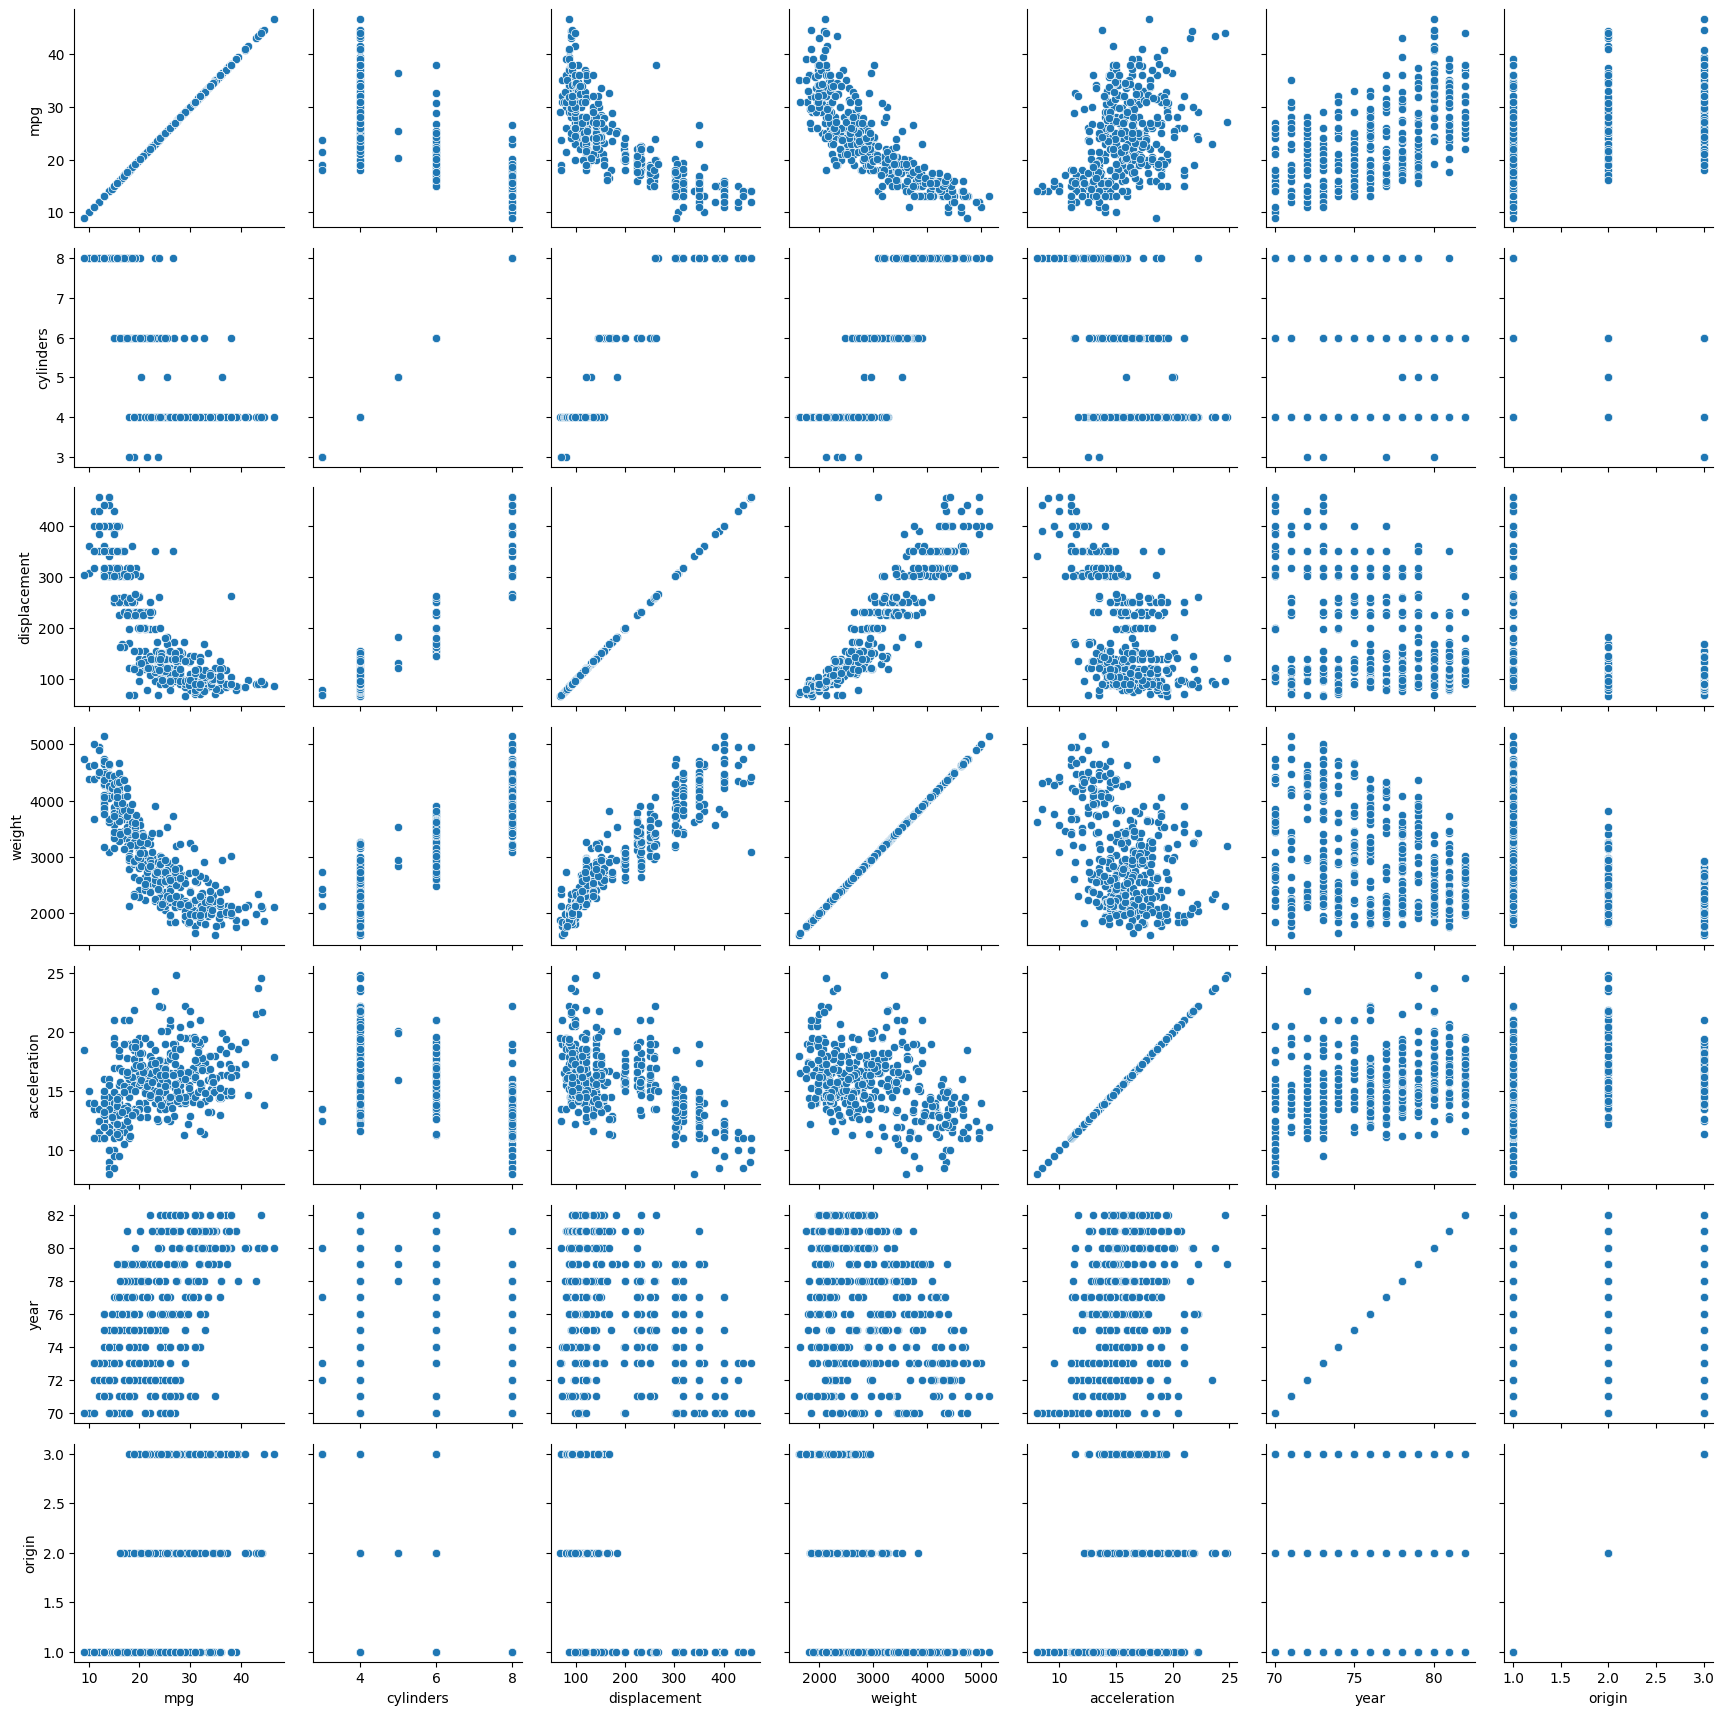

In [17]:
import matplotlib as plt
import seaborn as sns

g = sns.PairGrid(Auto)
g.map(sns.scatterplot)

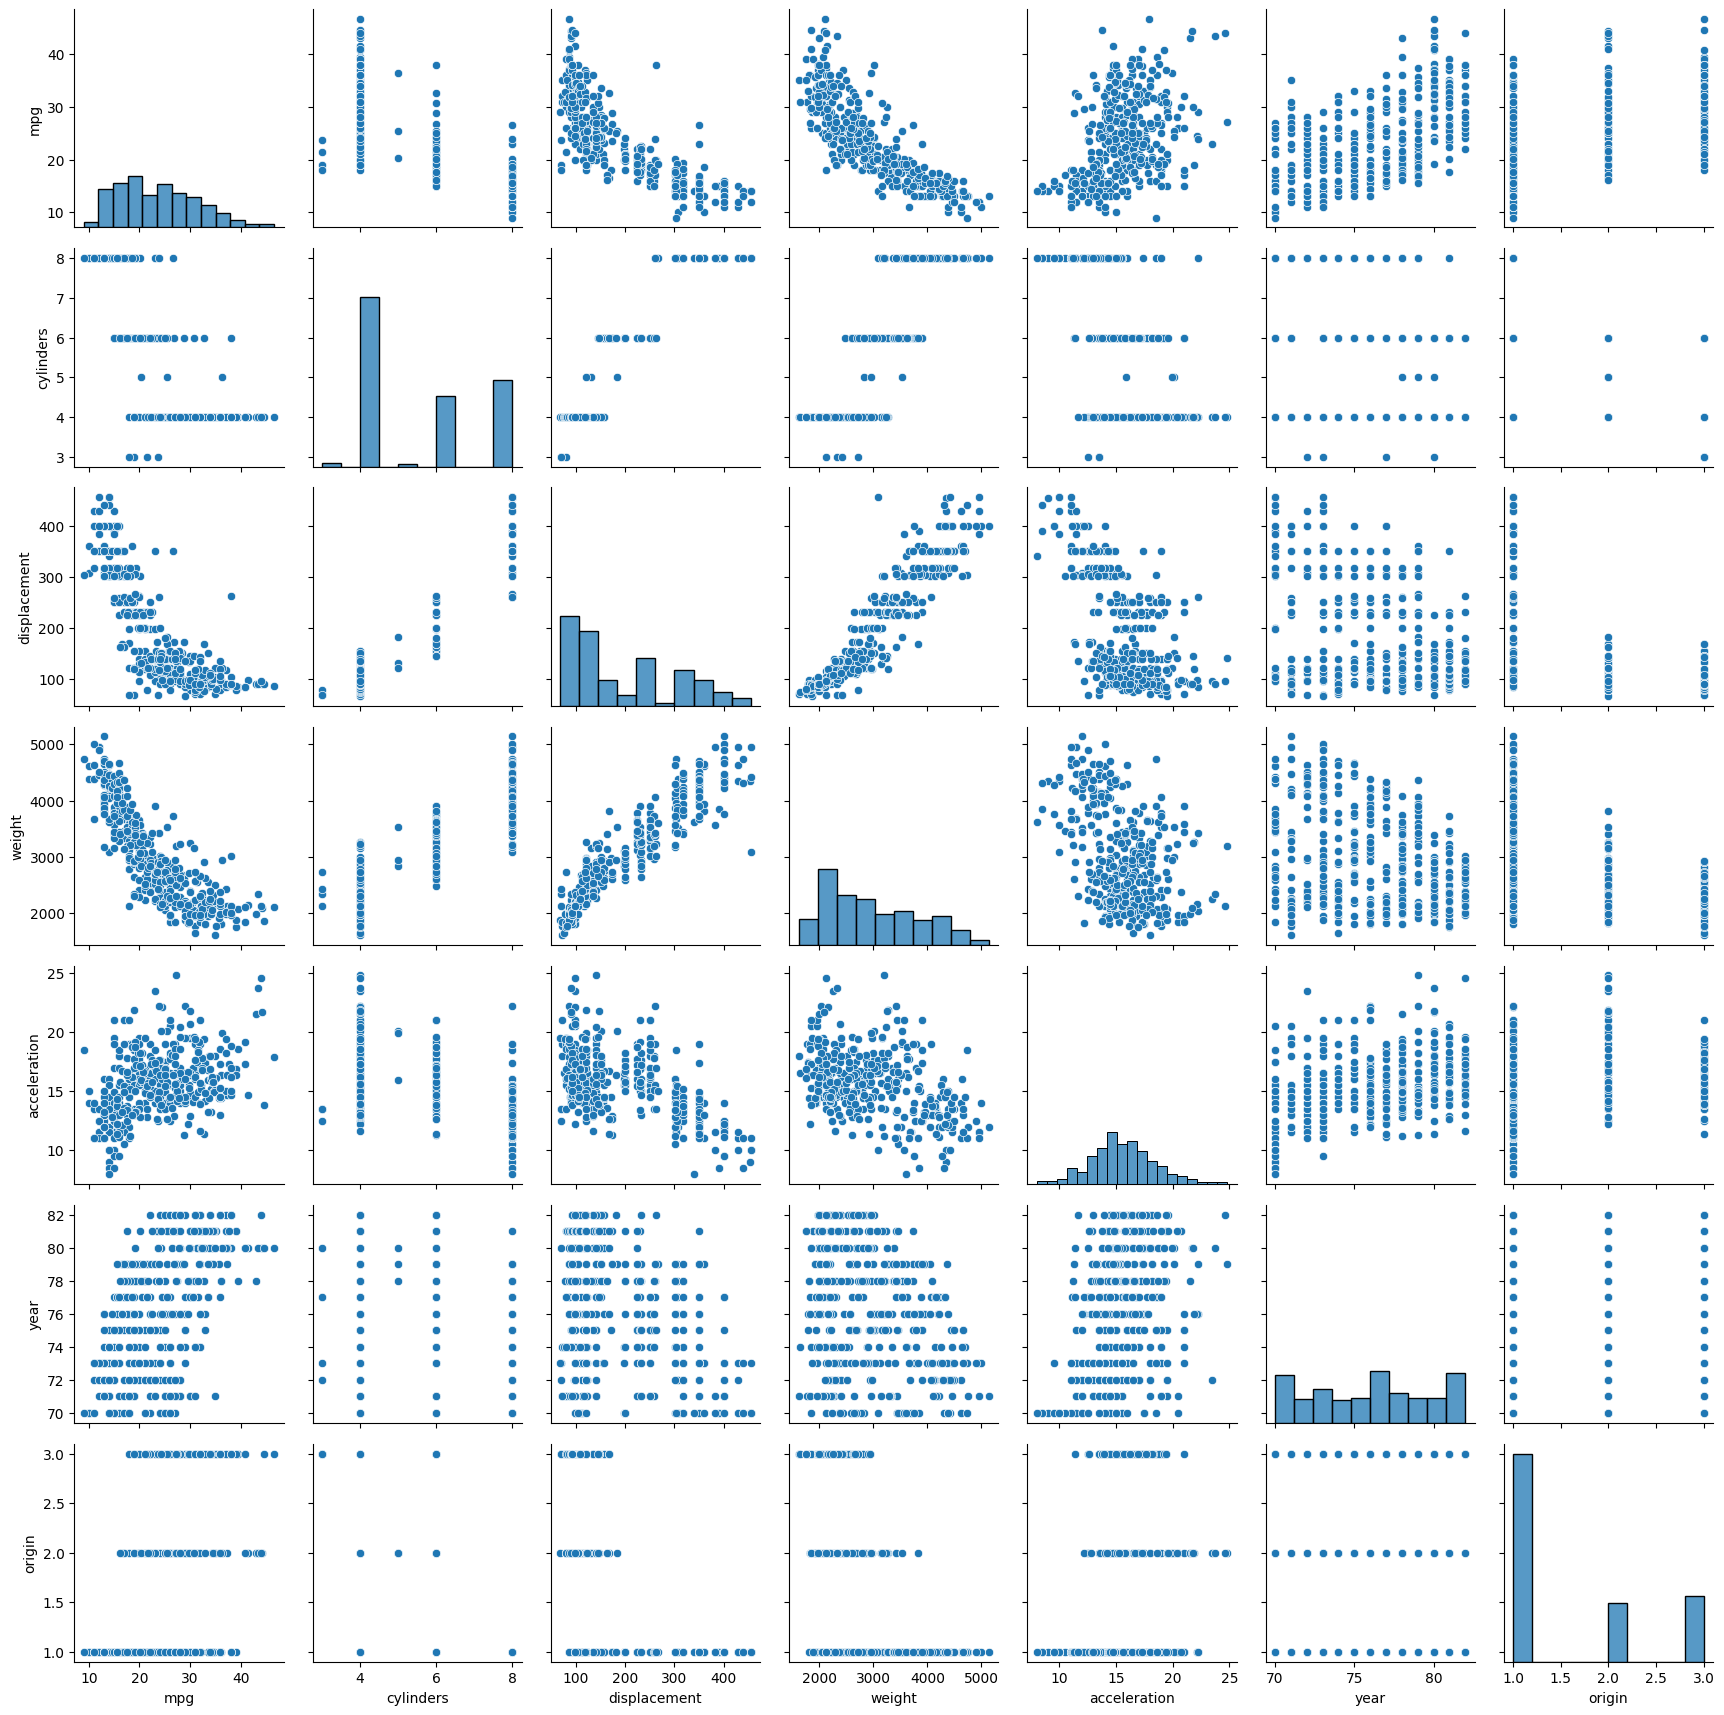

In [20]:
g = sns.PairGrid(Auto)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

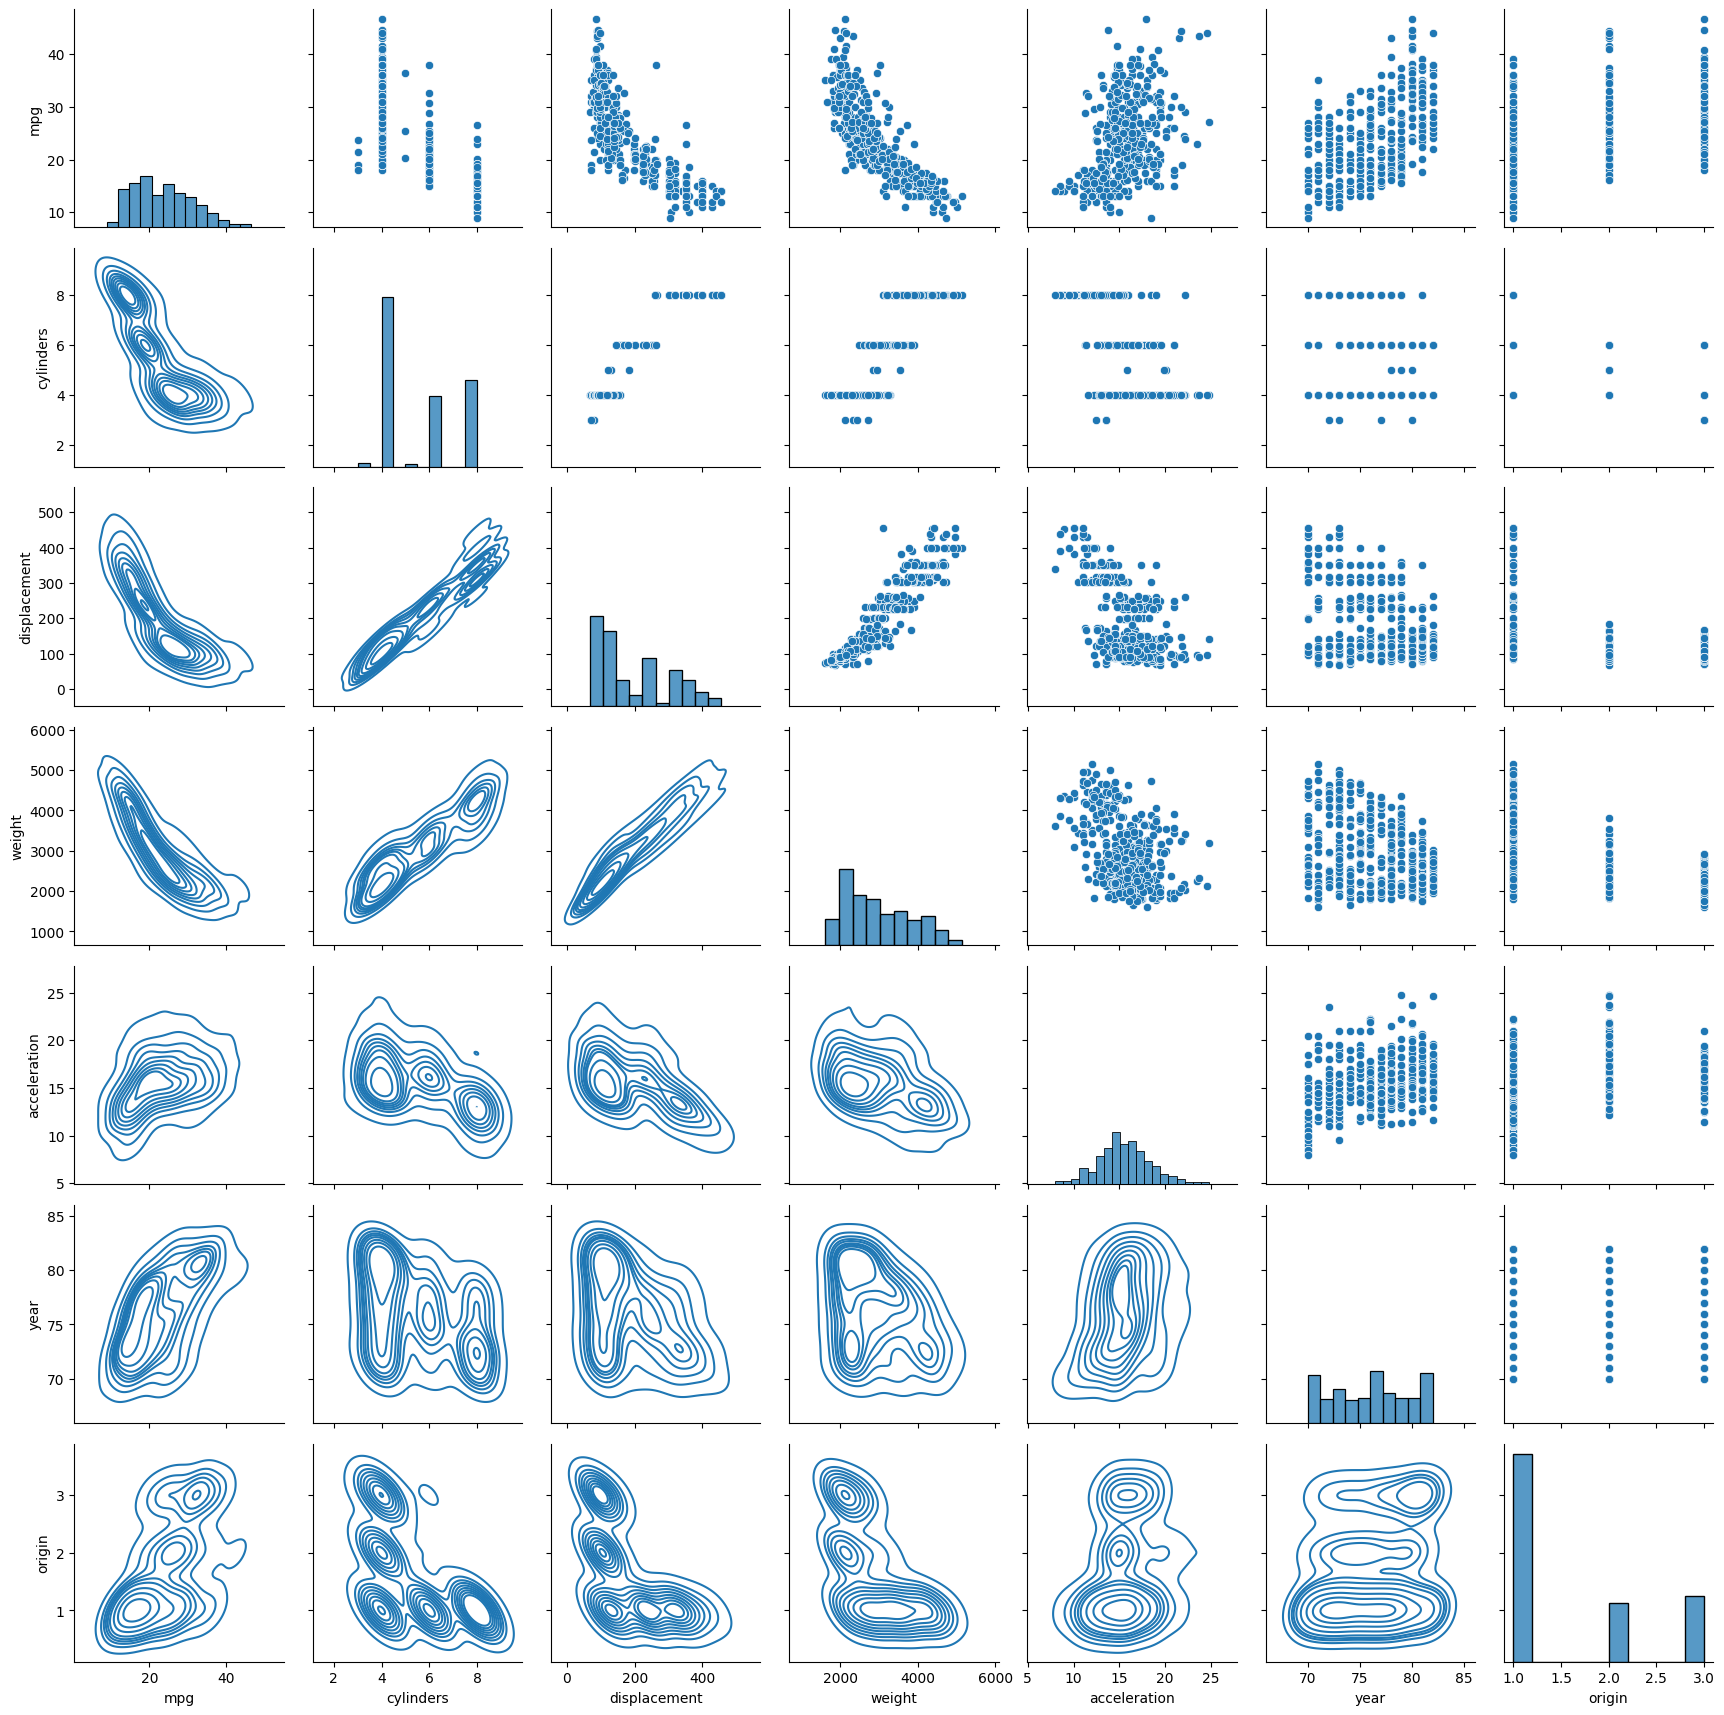

In [23]:
g = sns.PairGrid(Auto)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)